In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import graphviz
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', 500)

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/machine learning/assignment 2/melbourne-house-prices/cleaned_data.csv') 

Mounted at /content/drive


In [0]:
def run_gridsearch(X, y, clf, param_grid, cv=5):
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

In [3]:
data.head()

,suburb,rooms,type_code,max_bound_100K,price_bands,method_orig,method,realestate_agent,year,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,council_area,lattitude,longtitude,region_name,suburb_property_count
0,Footscray,1,u,100,0K-100K,PI,PI,Burnham,2016,6.4,3011,1.0,1.0,0.0,0.0,48.0,Maribyrnong City Council,-37.791100,144.890000,Western Metropolitan,7570
1,Malvern East,1,u,200,100K-200K,S,S,C21,2018,8.4,3145,1.0,1.0,1.0,0.0,48.0,Stonnington City Council,-37.876323,145.060902,Southern Metropolitan,8801
2,East Melbourne,1,u,200,100K-200K,PI,PI,Dixon,2017,1.3,3002,1.0,1.0,1.0,0.0,48.0,Melbourne City Council,-37.814904,144.985244,Northern Metropolitan,3040
3,Caulfield,4,h,200,100K-200K,PI,PI,Rodney,2017,8.9,3162,4.0,1.0,2.0,499.0,155.0,Glen Eira City Council,-37.886400,145.024200,Southern Metropolitan,2379
4,Coburg,4,h,200,100K-200K,PI,PI,Jellis,2016,7.8,3058,3.0,1.0,1.0,536.0,164.0,Darebin City Council,-37.755500,144.965800,Northern Metropolitan,11204


In [4]:
data.dtypes

suburb                    object
rooms                      int64
type_code                 object
max_bound_100K             int64
price_bands               object
method_orig               object
method                    object
realestate_agent          object
year                       int64
distance                 float64
postcode                   int64
bedrooms                 float64
bathrooms                float64
car_parks                float64
landsize                 float64
building_area            float64
council_area              object
lattitude                float64
longtitude               float64
region_name               object
suburb_property_count      int64
dtype: object

In [5]:
print(data.columns)

Index(['suburb', 'rooms', 'type_code', 'max_bound_100K', 'price_bands',
       'method_orig', 'method', 'realestate_agent', 'year', 'distance',
       'postcode', 'bedrooms', 'bathrooms', 'car_parks', 'landsize',
       'building_area', 'council_area', 'lattitude', 'longtitude',
       'region_name', 'suburb_property_count'],
      dtype='object')


In [6]:
data.shape

(27229, 21)

In [7]:
data.isnull().values.any()

False

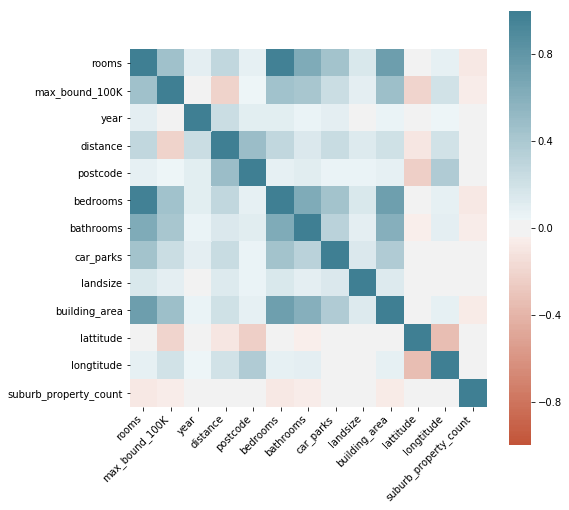

,rooms,max_bound_100K,year,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,lattitude,longtitude,suburb_property_count
rooms,1.000000,0.463903,0.089446,0.285114,0.081234,0.969005,0.644896,0.439429,0.151625,0.745272,0.023818,0.081318,-0.079284
max_bound_100K,0.463903,1.000000,-0.020456,-0.212101,0.045374,0.452199,0.424980,0.229168,0.086682,0.469274,-0.207337,0.194270,-0.059028
year,0.089446,-0.020456,1.000000,0.230536,0.103301,0.103520,0.059761,0.086769,0.034503,0.049145,0.023354,0.040513,0.010034
distance,0.285114,-0.212101,0.230536,1.000000,0.488763,0.287155,0.146233,0.245327,0.131156,0.201739,-0.099083,0.193880,-0.020632
postcode,0.081234,0.045374,0.103301,0.488763,1.000000,0.083952,0.110013,0.061746,0.059697,0.078429,-0.235011,0.369012,0.024162
bedrooms,0.969005,0.452199,0.103520,0.287155,0.083952,1.000000,0.642320,0.440697,0.149850,0.726843,0.023734,0.083421,-0.078900
bathrooms,0.644896,0.424980,0.059761,0.146233,0.110013,0.642320,1.000000,0.322728,0.097346,0.594081,-0.040556,0.098428,-0.052581
car_parks,0.439429,0.229168,0.086769,0.245327,0.061746,0.440697,0.322728,1.000000,0.144052,0.367464,0.010537,0.033743,-0.031114
landsize,0.151625,0.086682,0.034503,0.131156,0.059697,0.149850,0.097346,0.144052,1.000000,0.126361,0.036247,0.010503,-0.026649
building_area,0.745272,0.469274,0.049145,0.201739,0.078429,0.726843,0.594081,0.367464,0.126361,1.000000,-0.005258,0.080449,-0.065010


In [8]:
## correlation matrix
corr = data.corr()
plt.figure(figsize = (8,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

data.corr()

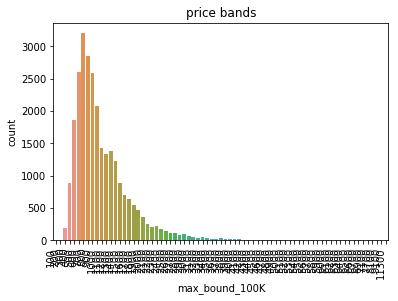

Index(['suburb', 'rooms', 'type_code', 'price_bands', 'method_orig', 'method',
       'realestate_agent', 'year', 'distance', 'postcode', 'bedrooms',
       'bathrooms', 'car_parks', 'landsize', 'building_area', 'council_area',
       'lattitude', 'longtitude', 'region_name', 'suburb_property_count'],
      dtype='object')

In [9]:
data_copy = data.copy()

#### explore the target ###
plot = sns.countplot(data_copy['max_bound_100K'])
plot.set_title("price bands")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")
plt.show()

plt.rcParams["figure.figsize"] = (50, 40)

## remove missing building area
# data_copy = data_copy.loc[data_copy['building_area'] > 0]
# print(data_copy.shape)
data_copy = data_copy.drop(columns=['max_bound_100K'])
# data_copy = data_copy.drop(columns=['building_area'])

data_copy.columns

In [10]:
data_copy.head()

,suburb,rooms,type_code,price_bands,method_orig,method,realestate_agent,year,distance,postcode,bedrooms,bathrooms,car_parks,landsize,building_area,council_area,lattitude,longtitude,region_name,suburb_property_count
0,Footscray,1,u,0K-100K,PI,PI,Burnham,2016,6.4,3011,1.0,1.0,0.0,0.0,48.0,Maribyrnong City Council,-37.791100,144.890000,Western Metropolitan,7570
1,Malvern East,1,u,100K-200K,S,S,C21,2018,8.4,3145,1.0,1.0,1.0,0.0,48.0,Stonnington City Council,-37.876323,145.060902,Southern Metropolitan,8801
2,East Melbourne,1,u,100K-200K,PI,PI,Dixon,2017,1.3,3002,1.0,1.0,1.0,0.0,48.0,Melbourne City Council,-37.814904,144.985244,Northern Metropolitan,3040
3,Caulfield,4,h,100K-200K,PI,PI,Rodney,2017,8.9,3162,4.0,1.0,2.0,499.0,155.0,Glen Eira City Council,-37.886400,145.024200,Southern Metropolitan,2379
4,Coburg,4,h,100K-200K,PI,PI,Jellis,2016,7.8,3058,3.0,1.0,1.0,536.0,164.0,Darebin City Council,-37.755500,144.965800,Northern Metropolitan,11204


In [11]:
data_copy['postcode'] = data_copy['postcode'].apply(str)

data_copy.dtypes

suburb                    object
rooms                      int64
type_code                 object
price_bands               object
method_orig               object
method                    object
realestate_agent          object
year                       int64
distance                 float64
postcode                  object
bedrooms                 float64
bathrooms                float64
car_parks                float64
landsize                 float64
building_area            float64
council_area              object
lattitude                float64
longtitude               float64
region_name               object
suburb_property_count      int64
dtype: object

In [0]:
# function used to find the split that produces the error closest to the average error
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [64]:
## seperate target and attributes
X = data_copy.drop(columns=['price_bands'])
Y = data_copy['price_bands']

n_splits = 5
kFold = model_selection.KFold(n_splits=n_splits, shuffle=True)
X.columns

Index(['suburb', 'rooms', 'type_code', 'method_orig', 'method',
       'realestate_agent', 'year', 'distance', 'postcode', 'bedrooms',
       'bathrooms', 'car_parks', 'landsize', 'building_area', 'council_area',
       'lattitude', 'longtitude', 'region_name', 'suburb_property_count'],
      dtype='object')

In [65]:
## encode attributes
X_converted = pd.get_dummies(X)

print("resulting data frame", X_converted.shape)

## encode target
le = preprocessing.LabelEncoder()
le.fit(Y)

Y_converted = le.transform(Y)
max_value = max(Y_converted)
print(max_value)
class_labels = le.inverse_transform(np.arange(max_value + 1))

print(Y_converted)
print(class_labels)

## standadize for use of truncated SVD
scaler = preprocessing.StandardScaler()
scaler.fit(X_converted)

X_converted = scaler.transform(X_converted)

resulting data frame (27229, 963)
72
[ 0  2  2  2  2  2  2  2  2  2  2  2 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 2

In [0]:
### truncated SVD

# svd = TruncatedSVD(n_components=962)
# svd.fit(X_converted) 
# print(svd.explained_variance_ratio_)  

# ## PCA

# pca = PCA(n_components=90, svd_solver='full')
# pca.fit(X_converted)  
# print(pca.explained_variance_ratio_)  

# X_converted = pca.transform(X_converted)
# len(pca.explained_variance_)

In [0]:
## decision tree parameter tuning
clf = tree.DecisionTreeClassifier()

param_grid = {
              'min_samples_leaf':[2, 3, 4, 5, 6, 7, 8],
              "max_depth": [10, 12, 13, 14, 15, 16],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9],
              }

grid_search = RandomizedSearchCV(estimator=clf,
                       
                     param_distributions=param_grid,
                     n_iter=10,
                     scoring='accuracy',
                     
                     
                     cv=5)


In [17]:
### parameter tuning
for trainIndex, testIndex in kFold.split(X_converted):
    grid_fitted = grid_search.fit(X_converted[trainIndex], Y_converted[trainIndex])
    best_parameters = grid_fitted.best_params_
    print(best_parameters)
    
    best_result = grid_fitted.best_score_
    print(best_result)
    

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 10}
0.23963641371711886


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 10}
0.24083000504980948


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 10}
0.2389937106918239


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 15}
0.23881008125602535


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 10}
0.23811053984575836


In [0]:
### random forest 

clf = RandomForestClassifier()

### parameter tuning

param_grid = {
              'n_estimators':[30],
              'max_features':['sqrt'],
              'max_depth': [24, 26, 28, 30, 32, 34, 36, 40, 50],
              'min_samples_leaf':[2, 3, 4, 5, 6, 7, 8, 9],
              'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16], 
                            
              }

grid_search = RandomizedSearchCV(estimator=clf,
                       
                     param_distributions=param_grid,
                     n_iter=15,
                     scoring='accuracy',
                     
                     
                     cv=5)

In [25]:
### parameter tuning
for trainIndex, testIndex in kFold.split(X_converted):
    grid_fitted = grid_search.fit(X_converted[trainIndex], Y_converted[trainIndex])
    best_parameters = grid_fitted.best_params_
    print(best_parameters)
    
    best_result = grid_fitted.best_score_
    print(best_result)
    

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
0.2560253408621402


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 24}
0.25630078501583803


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 36}
0.2584584308864711


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50}
0.25042464307028417


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 40}
0.2513312522952626


In [0]:
train_x, test_x, train_y, test_y = train_test_split(np.array(X_converted), np.array(Y_converted), test_size=0.2, random_state=42)

In [21]:
# clf = tree.DecisionTreeClassifier(min_samples_split=12)
clf = RandomForestClassifier(n_estimators=350, max_depth=34, max_features='sqrt', min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
print("accuracy: ")
print(metrics.accuracy_score(test_y, predictions))

accuracy: 
0.2827763496143959


In [22]:
### cross validating performance 

accuracies = []
trainIndexList = []
testIndexList = []

for trainIndex, testIndex in kFold.split(X_converted):
  trainIndexList.append(trainIndex)
  testIndexList.append(testIndex)
    
  clf = RandomForestClassifier(n_estimators=350, max_depth=34, max_features='sqrt', min_samples_split=5, min_samples_leaf=2, random_state=42)

  model = clf.fit(X_converted[trainIndex], Y_converted[trainIndex])
  predictions = model.predict(X_converted[testIndex])
  print("accuracy: ")
  accuracy = metrics.accuracy_score(Y_converted[testIndex], predictions)
  print(metrics.accuracy_score(Y_converted[testIndex], predictions))
  accuracies.append(accuracy)
  

accuracy: 
0.2737789203084833
accuracy: 
0.2767168564083731
accuracy: 
0.26643408005875874
accuracy: 
0.27983841351450606
accuracy: 
0.28264462809917357


In [66]:
# find the split that produces the error closest to the average error
best_split = find_nearest(accuracies, np.average(accuracies))

# get the final optimal model using the best split
train_x, test_x = X_converted[trainIndexList[best_split]], X_converted[testIndexList[best_split]]
train_y, test_y = Y_converted[trainIndexList[best_split]], Y_converted[testIndexList[best_split]]

clf = RandomForestClassifier(n_estimators=350, max_depth=34, max_features='sqrt', min_samples_split=5, min_samples_leaf=2, random_state=43)
model = clf.fit(train_x, train_y)

predictions = model.predict(test_x)
print(metrics.accuracy_score(test_y, predictions))

0.27836944546456116


In [41]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf)


y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,31,33,34,35,36,47,52,58,67,70,72
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,24,17,42,21,7,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,16,26,62,79
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,22,33,38,33,7,2,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,9,17,44,60
5,22,25,74,50,7,4,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,5,34,41
6,17,19,48,55,15,12,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,6,6,20,32
7,4,8,42,46,21,9,5,6,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,10,10
8,5,6,25,36,8,13,10,8,10,2,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,12,9
9,3,4,16,25,12,13,9,6,14,2,5,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,6
10,2,6,13,23,8,8,6,15,13,2,3,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,5


In [53]:
### adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=10, min_samples_leaf=8)
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=0.3, random_state=0)

model = clf.fit(train_x, train_y)

predictions = model.predict(test_x)
print(metrics.accuracy_score(test_y, predictions))

0.14304076386338596


In [54]:
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,31,32,33,35,36,47,58,67,70,72
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,26,29,55,52,27,10,8,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,14,29,38
2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,30,25,44,52,32,13,12,10,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,8,15,26
5,20,22,45,71,42,22,12,8,12,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,8
6,14,21,25,56,44,14,12,12,8,2,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,14
7,4,7,24,46,28,18,15,10,4,4,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,5
8,6,6,12,33,20,19,16,8,13,3,3,0,2,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3
9,6,3,7,20,13,17,7,22,15,3,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2
10,3,5,6,24,9,12,15,14,13,2,3,0,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
